In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
from IPython.lib.display import YouTubeVideo

# Week 07 (Monday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


with contributions totally ripped off from Gautham Narayan (UIUC)

# Where do we stand?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes

# Last Class: Stochastic Processes and Correlation Functions

# Today: so if you have a correlation function, how do you get to $y(t)$? Gaussian Processes!


A stochastic process is collection of variables drawn from _a probability distribution over functions_.

In other words, if our function of interest is $y(t)$, a stochastic process assigns probabilities $P\left[y(t)\right]$.

### Gaussian Processes

A Gaussian process has the property that

$P\left[y(x) | y(x_1), y(x_2), \ldots\right]$

is a Gaussian depending on the $x_i$ and $y(x_i)$. The process is specified by a "mean function" $\mu(x)$ and a "covariance function" $C(x)$, or "kernel," which determines how quickly $y(x)$ can vary.

### Gaussian Processes in Data Analysis

A draw from $P[y(x^*)]$ would represent a prior prediction for the function value $y(x^*)$

Typically we are more interested in the posterior prediction, drawn from $P[y(x^*)\vert y^{\rm obs}(x_{\rm obs})]$

$$ \log L = - \log | \Sigma| - |y -u|^T \Sigma^{-1} |y-u|$$


$$ \Sigma = (n x n)\text{ matrix}$$ 

with 

$$ \Sigma_{i,j} = \text{Cov}(y(t_i), y(t_j)) = \int_{-\infty}^{\infty} \text{PSD} e^{2\pi if |t_i - t_j|} \,df $$


The posterior PDF for $y(x^*)$ is a Gaussian, whose mean and standard deviation can be computed algebraically, and which is constrained by _all the previously observed $y(x)$_.


<img src="figures/mfm_gp_example.png"> 

### GP Regression

GP's provide a natural way to achieve high flexibility (and uncertainty) when _interpolating_ data. 

With the appropriate assumptions (e.g. Gaussian measurement errors), the calculation of the posterior for $y(x)$ is an _algebraic_ operation (no Monte Carlo required).

Marginalization over the GP hyperparameters (the width of the kernel, for example) is more computationally expensive (involving the determinants of the matrices), but [fast methods have been developed](http://dan.iel.fm/george/current/user/hyper/).

## Gaussian Processes are examples of Model "free" models - aka "non-parametric models"


Sometimes we simply don't have a good first-principles model for what's going on in our data, but we're also confident that making a simple assumption (e.g. Gaussian scatter) is dead wrong.

### What does "model-free" mean?

In these situations, we're motivated to avoid strong modeling assumptions and instead be more empirical.

Common adjectives:
* non-parametric
* model-independent
* data-driven
* empirical

(Strictly speaking, these tend to correspond to models with very many parameters, but the terminology persists.)

Gaussian processes appear to be "non-parametric" because the algebraic evaluation of the posterior PDF includes analytic marginalization over all the (nuisance) parameters in the model (the true values of $y$ at each $x_{\rm obs}$).

As with all non-parametric models, GPs are not "assumption-free" or "model-independent": they are just not _simply_ or _physically_ parametrized, and so involve different _types_ of assumptions.

The trade-off between simply-parametrized and non-parametric models is between _interpretability_ (typically high for simply-parametrized physical models) and _prediction accuracy_ (typically high for non-parametric models).

During the first half of the semester, you got famililar with observations drawn from a distribution e.g. $y1$, drawn from a Gaussian distribution with mean $\mu$ and variance $\sigma^2$:

\begin{align}
p(y_1 | \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left[ - \frac{(y_1-\mu)^2}{2 \sigma^2} \right] 
\end{align}

i.e.

### $$y_1 \sim \mathcal{N}(\mu,\sigma^2)$$

If pair of variables $y_1$ and $y_2$, drawn from a *bivariate Gaussian distribution*. The *joint probability density* for $y_1$ and $y_2$ is:

### $$
\left[ \begin{array}{l} y_1 \\ y_2 \end{array} \right] \sim \mathcal{N} \left(
\left[ \begin{array}{l} \mu_1 \\ \mu_2 \end{array}  \right] , 
\left[ \begin{array}{ll} 
\sigma_1^2 & C \\
C & \sigma_2^2 
\end{array}  \right] 
\right),
$$

where 

### $$C = {\rm cov}(y_1,y_2)$$ 

is the *covariance* between $y_1$ and $y_2$.

In the first half of the semester, we dealt with independent variables i.e.

### $$P(y_1 \cap y_2) = P(y_1) \cdot P(y_2) $$

and consequently


\begin{align}
P(y_2|y_1) = \frac{P(y_1 \cap y_2)}{P(y_1)} = P(y_2)
\end{align}

If two variables are independent, then $C = 0$ (remember converse isn't true). 

The observations are *uncorrelated* so measuring $y_1$ doesn't teach us anything about $y_2$.

(If in addition $\mu_1 = \mu_2$ and $\sigma_1 = \sigma_2$ the variables are i.i.d)

### With time-series, $C \ne 0$ 

If we know the value of $y_1$, the probability density for $y_2$ collapses to the the *conditional distribution* of $y_2$ given $y_1$:

### $$
p(y_2 \mid y_1) = \mathcal{N} \left( \mu_2 + C (y_1-\mu_1)/\sigma_1^2, \sigma_2^2-C^2\sigma_1^2 \right).
$$

### Now consider $N$ variables drawn from a multivariate Gaussian distribution:

### $$
\boldsymbol{y} \sim \mathcal{N} (\boldsymbol{\mu},\boldsymbol{\Sigma})
$$

where 

### $$\boldsymbol{y} = (y_1,y_2,\ldots,y_N)^T$$

### $$\boldsymbol{\mu} = (\mu_1,\mu_2,\ldots,\mu_N)^T$$ 


is the *mean vector*, and $\boldsymbol{\Sigma}$ is an $N \times N$ positive semi-definite *covariance matrix*, with elements 

### $$\Sigma_{ij}={\rm cov}(y_i,y_j)$$

### And then the likelihood generalizes from 1D:

\begin{align}
p(y_1 | \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left[ - \frac{(y_1-\mu)^2}{2 \sigma^2} \right] 
\end{align}

### to ND:


\begin{align}
p(\boldsymbol{y} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{2 \pi^N |\Sigma|} } \exp \left[ -\frac{1}{2} (\boldsymbol{y} - \boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{y} - \boldsymbol{\mu}) \right] 
\end{align}


This works because:

<img src="figures/gaussians_all_the_way_down.jpg">

## A Gaussian process is an extension of this concept to infinite $N$.

This gives rise to a probability distribution over functions, rather than finite $N$ samples. 

<img src="figures/gp.png">

Informally - infinitely long vector ~ function

Again, for finite number of $y$ drawn from a multivariate normal distribution:

### $$
\boldsymbol{y} \sim \mathcal{N} (\boldsymbol{\mu},\boldsymbol{\Sigma})
$$

This clearly doesn't make sense for infinite $N$, but the essential feature remains the same:
### A Gaussian process is completely specified by its *mean function* and *covariance function*.  

### Incorporating observational error is similar to what you did in the past as well:

### $$ y \sim f(t) + \epsilon$$ 

### with deviations from the truth related to the observational uncertainties

### $$ \epsilon \sim \mathcal{N}(0, \sigma_y^2) $$


### except now, $f(t)$ is a function not of some parameters, but rather of functions thenselves:

###  $$ f(t) \sim \mathcal{GP}(m(t), k(t,t'))$$

### where I'm switching from $\mu$ to $m(t)$ and $\Sigma$ to $k(t, t')$ just to make explicit that these are not vectors.

I'm using $k$ because this function that describes the covariance between time $t$ and $t'$ is called a **kernel** function. 

## Thankfully, in the real world, we only have a finite number of observations

Previously, we saw:

### $$\Sigma_{ij}={\rm cov}(y_i,y_j)$$

We don't have a parameteric model for $y$ anymore, but that's OK, we can write down a parametric model for the covariance itself, i.e.:

### $$
\mathrm{cov}(y(t),y(t'))=k(t,t') $$


That's helpful to do, because with finite observations:

### $$
\mathrm{cov}(y_i,y_j)=k(t_i,t_j)
$$

## So we don't have parametrized model, but do have parametrized covariance - what can we do with this thing?

## The prior

Now consider a finite set of observations: inputs $\boldsymbol{t}$, with corresponding outputs $\boldsymbol{y}$.

The *joint distribution* of $\boldsymbol{y}$ given $\boldsymbol{t}$, $m$ and $k$ is

### $$
\mathrm{p}(\boldsymbol{y} \mid \boldsymbol{t},m,k) = \mathcal{N}( \boldsymbol{m},K),
$$

where again, $\boldsymbol{m}=m(\boldsymbol{t})$ is the *mean vector* 

and $K$ is the *covariance matrix*, with elements $K_{ij} = k(t_i,t_j)$.

Note, there isn't one single function, but infinitely many for a specific choice of $m$, $k$. We marginalize over them to find the posterior mean. The parameters of $m$ and $k$ are called "hyper parameters". The interesting bit here is the covariance function/kernel, $k$ (we can always recenter the data to have mean = 0).

## Test and training sets

Suppose we have an (observed) *training set* $(\boldsymbol{t},\boldsymbol{y})$. 

We are interested in some other *test set* of inputs $\boldsymbol{t}_*$.

The joint distribution over the training and test sets is
### $$
\mathrm{p} \left( \left[ \begin{array}{l} \boldsymbol{y} \\ \boldsymbol{y}_* \end{array} \right] \right) 
= \mathcal{N} \left( \left[ \begin{array}{l} \boldsymbol{m} \\ \boldsymbol{m}_* \end{array} \right], 
\left[ \begin{array}{ll} K & K_* \\ K_*^T & K_{**} \end{array} \right] \right),
$$

where $\boldsymbol{m}_* = m(\boldsymbol{x}_*)$, $K_{**,ij} = k(t_{*,i},t_{*,j})$ and $K_{*,ij} = k(t_i,t_{*,j})$. 

This is not really any different from when we just had two observations:

### $$
\left[ \begin{array}{l} y_1 \\ y_2 \end{array} \right] \sim \mathcal{N} \left(
\left[ \begin{array}{l} \mu_1 \\ \mu_2 \end{array}  \right] , 
\left[ \begin{array}{ll} 
\sigma_1^2 & C \\
C & \sigma_2^2 
\end{array}  \right] 
\right),
$$

# For notational brevity I'm going to set the mean to 0.

## The conditional distribution

The *conditional distribution* for the test set given the training set is:

### $$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T K^{-1} \boldsymbol{y}, K_{**} - K_*^T K^{-1} K_* ).
$$

This is also just a straight forward generalization from what we had with just two points:

### $$
p(y_2 \mid y_1) = \mathcal{N} \left( \mu_2 + C (y_1-\mu_1)/\sigma_1^2, \sigma_2^2-C^2\sigma_1^2 \right).
$$

This is called the **predictive distribution**, because it can be use to predict future (or past) observations. 

More generally, it can be used for *interpolating* the observations to any desired set of inputs. 

This is one of the most widespread applications of GPs in some fields (e.g. kriging in geology, economic forecasting, ...)

## Real observations always contain a component of *white noise*

We need to account for this, but don't necessarily want to include in the predictions. 


If the white noise variance $\sigma^2$ is constant, we can write 

### $$
\mathrm{cov}(y_i,y_j)=k(t_i,t_j)+\delta_{ij} \sigma^2,
$$


and the conditional distribution becomes


### $$ 
\mathrm{p} ( \boldsymbol{y}_* \mid \boldsymbol{y},k) = \mathcal{N} ( 
K_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{y}, K_{**} - K_*^T (K + \sigma^2 \mathbb{I})^{-1} K_* ).
$$


We assumed constant white noise, but it's trivial to allow for different $\sigma$ for each data point.

You could also add some intrinsic dispersion as you often have to do. 

In real life, we may need to learn $\sigma_{\text{int}}$ from the data, alongside the other contribution to the covariance matrix.

## Single-point prediction

Let us look more closely at the predictive distribution for a single test point $t_*$.

It is a Gaussian with mean:
### $$
\overline{y}_* = \boldsymbol{k}_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{y}
$$

and variance
### $$
\mathbb{V}[y_*] = k(t_*,t_*) - \boldsymbol{k}_*^T (K + \sigma^2 \mathbb{I})^{-1} \boldsymbol{k}_*,
$$
where $\boldsymbol{k}_*$ is the vector of covariances between the test point and the training points.

Notice the mean is a linear combination of the observations: the GP is a *linear predictor*.

It is also a linear combination of covariance functions, each centred on a training point:

### $$
\overline{y}_* = \sum_{i=1}^N \alpha_i k(x_i,x_*),
$$
where $\alpha_i = (K + \sigma^2 \mathbb{I})^{-1} y_i$

## The likelihood

The *likelihood* of the data under the GP model is simply:

### $$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{t}) = \mathcal{N}(\boldsymbol{y} \, | \, \boldsymbol{0},K + \sigma^2 \mathbb{I}).
$$

This is a measure of how well the model explains, or predicts, the training set.

i.e. **The observed $\boldsymbol{y}$ are noisy realisations of a latent (unobserved) Gaussian process $\boldsymbol{f}$.**

We are marginalizing over the function values $\boldsymbol{f}$:
### $$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{t}) = \int \mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{f},\boldsymbol{t}) \, \mathrm{p}(\boldsymbol{f} \,|\, \boldsymbol{t}) \, \mathrm{d}\boldsymbol{f},
$$

where 


### $$
\mathrm{p}(\boldsymbol{f} \,|\, \boldsymbol{t}) = \mathcal{N}(\boldsymbol{f} \, | \, \boldsymbol{0},K)
$$


is the *prior*, and 


### $$
\mathrm{p}(\boldsymbol{y} \,|\, \boldsymbol{f},\boldsymbol{t}) = \mathcal{N}(\boldsymbol{y} \, | \, \boldsymbol{0},\sigma^2 \mathbb{I})
$$
is the *likelihood*.

# You "condition" the hyperparameters on some observed data

i.e. evaluate the conditional (or predictive) distribution for a given covariance matrix (i.e. covariance function and hyper-parameters), and training set.

## *Training* the GP...

...means maximising the *likelihood* of the model with respect to the hyperparameters.

## The kernel trick

Consider a linear basis model with arbitrarily many *basis functions*, or *features*, $\Phi(x)$, and a (Gaussian) prior $\Sigma_{\mathrm{p}}$ over the basis function weights. 

You end up with exactly the same expressions for the predictive distribution and the likelihood so long as:
### $$
k(\boldsymbol{x},\boldsymbol{x'}) = \Phi(\boldsymbol{x})^{\mathrm{T}} \Sigma_{\mathrm{p}} \Phi(\boldsymbol{x'}),
$$


or, writing $\Psi(\boldsymbol{x}) = \Sigma_{\mathrm{p}}^{1/2} \Phi(\boldsymbol{x})$,


### $$
k(\boldsymbol{x},\boldsymbol{x'}) = \Psi(\boldsymbol{x}) \cdot \Psi(\boldsymbol{x'}),
$$

Thus the covariance function $k$ enables us to go from a (finite) *input space* to a (potentially infinite) *feature space*. This is known as the *kernel trick* and the covariance function is often referred to as the *kernel*.

# In-class warm-up: a worked Gaussian Process example

### Let's start by considering a simple function: $f(x) = x * \sin(x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

np.random.seed(2)
def f(x):
    """The function to predict."""
    return x * np.sin(x)

<ErrorbarContainer object of 3 artists>

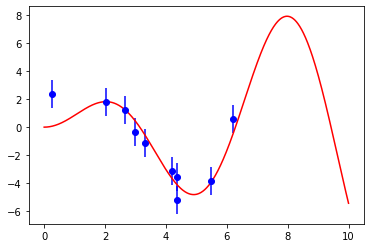

In [2]:
xmax = 10
X_space = np.linspace(0.001, xmax - 0.001, 1000)

# Get the "real" value
y_real = f(X_space)

n = 10
# Uniform sampling and add Gaussian noise
x_sample = np.random.random(n)*10

sigma = 1.0
noise = np.random.normal(0, sigma, n)
y_meas = f(x_sample) + noise

plt.plot(X_space,y_real,"r")
plt.errorbar(x_sample,y_meas,yerr=sigma,fmt="bo")

In the real world we just have the data and we want to predict a new value (in this case, at $x_p$ = 5).


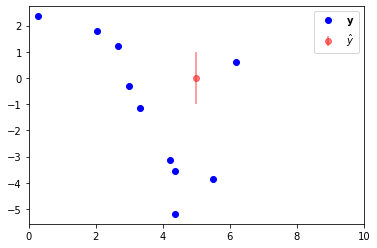

In [3]:
sigma = 1.0
y_p = 0.0
x_p = 5.0
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,y_p,yerr=sigma,fmt="ro",label="$\hat{y}$",alpha=0.5)
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()

In [7]:
x_comb = np.append(x_p,x_sample)

We model the random vector (a priori) as $$\begin{bmatrix}\hat{Y} \\ \mathbf{Y} \end{bmatrix} \sim Pr\left(\begin{bmatrix}\hat{Y} \\ \mathbf{Y} \end{bmatrix} = \begin{bmatrix}\hat{y} \\ \mathbf{y} \end{bmatrix}\right) = \mathcal{N}\left(\begin{bmatrix}0 \\ \mathbf{0} \end{bmatrix}, \begin{bmatrix} K(\hat{x},\hat{x}) & K(\hat{x},\mathbf{x}) \\ K(\mathbf{x},\hat{x}) & K(\mathbf{x},\mathbf{x}) \end{bmatrix}\right) = \mathcal{N}\left(\begin{bmatrix}0 \\ \mathbf{0} \end{bmatrix}, \begin{bmatrix} a & \mathbf{b}^T \\  \mathbf{b} & C \end{bmatrix}\right) $$

(-5.570975251039949, 2.7362768371568604)

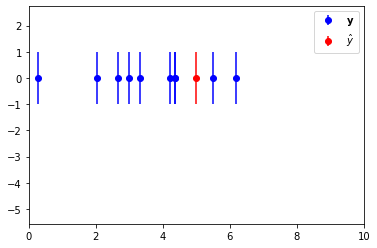

In [4]:
plt.errorbar(x_sample,np.zeros((n,1)),fmt="bo",label="$\mathbf{y}$",yerr=sigma)
plt.errorbar(x_p,0,yerr=sigma,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
plt.ylim(ylim)

What we want to do is to do is to **update** this model with our data:

$$\hat{y} \sim Pr(\hat{Y}=\hat{y}| \mathbf{Y} = \mathbf{y}) = \mathcal{N}\left(\hat{y};\mathbf{b}^T C^{-1} \mathbf{y},  a - \mathbf{b}^T C^{-1} \mathbf{b} \right)$$

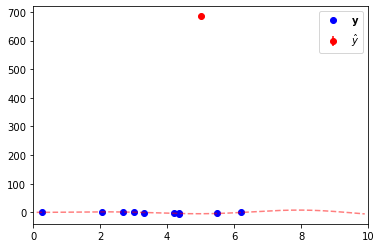

In [24]:
a = S[0,0]
b = S[0,1:]
C = S[1:,1:]
Cinv = np.linalg.inv(C)
mu_p = b.dot(Cinv).dot(y_meas)
sig_p = a - b.dot(Cinv).dot(b)
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,mu_p,yerr=sig_p,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()
plt.plot(X_space,y_real,"r--",alpha=0.5)

### THIS LOOKS AWFUL! But why? Make a plot of $C^{-1}$

/Users/mcoughlin/opt/anaconda3/envs/ast8581/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


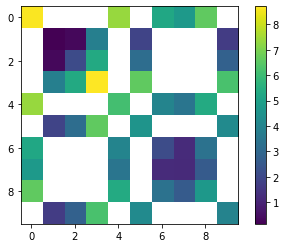

In [25]:


plt.imshow(np.log10(Cinv))
plt.colorbar()

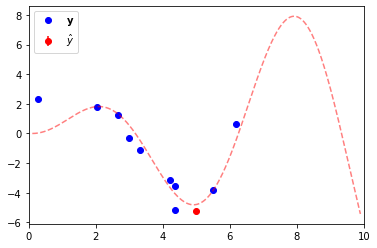

In [26]:
lamb = 0.01
Cinv = np.linalg.inv(C + lamb*np.eye(C.shape[0],C.shape[1]))
mu_p = b.dot(Cinv).dot(y_meas)
sig_p = a - b.dot(Cinv).dot(b)
plt.plot(x_sample,y_meas,"bo",label="$\mathbf{y}$")
plt.errorbar(x_p,mu_p,yerr=sig_p,fmt="ro",label="$\hat{y}$")
plt.legend()
plt.xlim(0,10)
ylim=plt.ylim()
plt.plot(X_space,y_real,"r--",alpha=0.5)

### THIS LOOKS BETTER! But why? Make a plot of $C^{-1}$

/Users/mcoughlin/opt/anaconda3/envs/ast8581/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


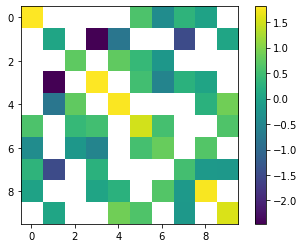

In [27]:
plt.imshow(np.log10(Cinv))
plt.colorbar()

Now consider that we want to do the same but for a vector of $\mathbf{\hat{y}}$ values for the $\mathbf{\hat{x}}$ points.

$$\begin{bmatrix}\mathbf{\hat{Y}} \\ \mathbf{Y} \end{bmatrix} \sim Pr\left(\begin{bmatrix}\mathbf{\hat{Y}} \\ \mathbf{Y} \end{bmatrix} = \begin{bmatrix}\mathbf{\hat{y}} \\ \mathbf{y} \end{bmatrix}\right) = \mathcal{N}\left(\begin{bmatrix}\mathbf{0} \\ \mathbf{0} \end{bmatrix}, \begin{bmatrix} K(\mathbf{\hat{x}},\mathbf{\hat{x}}) & K(\mathbf{\hat{x}},\mathbf{x}) \\ K(\mathbf{x},\mathbf{\hat{x}}) & K(\mathbf{x},\mathbf{x}) + \lambda I \end{bmatrix}\right) = \mathcal{N}\left(\begin{bmatrix}\mathbf{0} \\ \mathbf{0} \end{bmatrix}, \begin{bmatrix} A & B^T \\  B & C \end{bmatrix}\right) $$

Now
$$\mathbf{\hat{y}} \sim Pr(\mathbf{\hat{Y}}=\mathbf{\hat{y}}| \mathbf{Y} = \mathbf{y}) = \mathcal{N}\left(\mathbf{\hat{y}} ; B^T C^{-1} \mathbf{y},  A - B^T C^{-1} B \right)$$




Of course, we need to adopt a Kernel function (we went through many of them last week...). We will use an Exponential Quadratic Kernel here:
$$ \Sigma_{ij} = K(x_j,x_i) = \sigma^2 \exp\left(-\frac{(x_j - x_i)^2}{2\mathcal{l}^2} \right)$$

What does this metric look like in space?

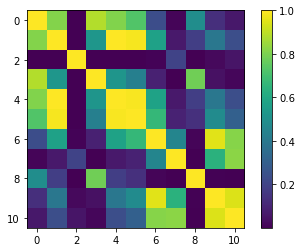

In [9]:
l = 1.0
X = np.atleast_2d(x_comb).T
M=sklearn.metrics.pairwise_distances(X,X)
S=sigma*sigma*np.exp(M*M/(-2*l*l))
plt.imshow(S)
plt.colorbar()

In [28]:
X = np.atleast_2d(x_sample).T

In [29]:
from ipywidgets import interact
X_space = np.linspace(0.1, 9.9, 1000)
X_space = np.atleast_2d(X_space).T

def gen_data(n = 10,sigma =1.0):
    # Get the "real" value
    x_sample = np.random.random(n)*10
    noise = np.random.normal(0, sigma, n)
    y_meas = f(x_sample) + noise
    X = np.atleast_2d(x_sample).T
    return(X,y_meas)

def predict_GMM_plot(lamb=0.1,sigma=1.0,l=1.0,bars=False,instances=False):
    dA=sklearn.metrics.pairwise_distances(X_space,X_space)
    dB=sklearn.metrics.pairwise_distances(X,X_space)
    dC=sklearn.metrics.pairwise_distances(X,X)
    A=sigma*sigma*np.exp(dA*dA/(-2*l*l))
    B=sigma*sigma*np.exp(dB*dB/(-2*l*l))
    C=sigma*sigma*np.exp(dC*dC/(-2*l*l))
    sI = lamb*np.eye(C.shape[0],C.shape[1])
    Cinv = np.linalg.inv(C + sI)
    mu_p = B.T.dot(Cinv).dot(y_meas)
    cov_p = A - B.T.dot(Cinv).dot(B)
    plt.plot(X,y_meas,"bo",label="$\mathbf{y}$")
    if bars:
        plt.errorbar(X_space,mu_p,yerr=1.96*np.diag(cov_p),fmt="r",label="$\mathbf{\hat{y}}$",alpha=0.2)
    else:
        plt.plot(X_space,mu_p,"r",label="$\mathbf{\hat{y}}$",alpha=0.8)
    plt.plot(X_space,y_real,"k--",alpha=0.5,label="f(x)")
    if instances:
        #L=np.linalg.cholesky(cov_p)
        for i in range(10):
            inst=np.random.multivariate_normal(mu_p, cov_p)
            #z = np.random.normal(0, 1.0, mu_p.length)
            #inst = mu_p + L.dot(z)
            plt.plot(X_space,inst,alpha=0.5)
    
    plt.legend()
    plt.xlim(0,max(X_space))
    ylim=plt.ylim() 
    


In [30]:
interact(predict_GMM_plot,lamb=(0.0,1.0,0.01),sigma=(0.1,2.0,0.1),l=(0.1,5.0,0.1))

interactive(children=(FloatSlider(value=0.1, description='lamb', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.predict_GMM_plot>

In [31]:
X,y_meas = gen_data(n=25,sigma=1.0)
interact(predict_GMM_plot,lamb=(0.0,1.0,0.01),sigma=(0.1,4.0,0.1))

interactive(children=(FloatSlider(value=0.1, description='lamb', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.predict_GMM_plot>

In [32]:
X_space = np.linspace(0.1, 30.0, 1000)
X_space = np.atleast_2d(X_space).T
y_real = f(X_space)
X,y_meas = gen_data(n=25,sigma=1.0)
interact(predict_GMM_plot,lamb=(0.0,1.0,0.01),sigma=(1,40.0,1),l=(0.1,4.0,0.1))

interactive(children=(FloatSlider(value=0.1, description='lamb', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.predict_GMM_plot>

# In-class warm-up: We will try another one (a Periodic Kernel) here:

$K(x,x') = \sigma^2 exp\left(−\frac{2 sin^2\left(\frac{\pi(x− x′)}{p}\right)}{l^2}\right)$


In [33]:
def predict_GMMper_plot(lamb=0.1,sigma=1.0,l=1.0,p=10.0,bars=False,instances=False):
    dA=sklearn.metrics.pairwise_distances(X_space,X_space)
    dB=sklearn.metrics.pairwise_distances(X,X_space)
    dC=sklearn.metrics.pairwise_distances(X,X)
    sA=np.sin(np.pi*dA/p)
    sB=np.sin(np.pi*dB/p)
    sC=np.sin(np.pi*dC/p)
    A=sigma*sigma*np.exp(2*sA*sA/(-l*l))
    B=sigma*sigma*np.exp(2*sB*sB/(-l*l))
    C=sigma*sigma*np.exp(2*sC*sC/(-l*l))
    sI = lamb*np.eye(C.shape[0],C.shape[1])
    Cinv = np.linalg.inv(C + sI)
    mu_p = B.T.dot(Cinv).dot(y_meas)
    cov_p = A - B.T.dot(Cinv).dot(B)
    plt.plot(X,y_meas,"bo",label="$\mathbf{y}$")
    if bars:
        plt.errorbar(X_space,mu_p,yerr=1.96*np.diag(cov_p),fmt="r",label="$\mathbf{\hat{y}}$",alpha=0.2)
    else:
        plt.plot(X_space,mu_p,"r",label="$\mathbf{\hat{y}}$",alpha=0.8)
    plt.plot(X_space,y_real,"k--",alpha=0.5,label="f(x)")
    if instances:
        #L=np.linalg.cholesky(cov_p)
        for i in range(10):
            inst=np.random.multivariate_normal(mu_p, cov_p)
            #z = np.random.normal(0, 1.0, mu_p.length)
            #inst = mu_p + L.dot(z)
            plt.plot(X_space,inst,alpha=0.5)
    
    plt.legend()
    plt.xlim(0,max(X_space))
    ylim=plt.ylim() 
    

In [34]:
interact(predict_GMMper_plot,lamb=(0.0,1.0,0.01),sigma=(1,40.0,1),l=(0.1,4.0,0.1),p=(0.1,30.0,0.1))

interactive(children=(FloatSlider(value=0.1, description='lamb', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.predict_GMMper_plot>

# In-class warm-up: We will try another one (a Periodic + Exponential Quadratic Kernel) here:

$K(x,x') = \sigma^2 exp\left(−\frac{2 sin^2\left(\frac{\pi(x− x′)}{p}\right)}{l^2}\right) \sigma^2 exp\left(-\frac{(x_j - x_i)^2}{2\mathcal{l}^2} \right) $

In [35]:
def predict_GMMcomb_plot(lamb=0.1,sigma=1.0,l=1.0,p=10.0,bars=False,instances=False):
    dA=sklearn.metrics.pairwise_distances(X_space,X_space)
    dB=sklearn.metrics.pairwise_distances(X,X_space)
    dC=sklearn.metrics.pairwise_distances(X,X)
    sA=np.sin(np.pi*dA/p)
    sB=np.sin(np.pi*dB/p)
    sC=np.sin(np.pi*dC/p)
    A=sigma*sigma*np.exp(2*sA*sA/(-l*l))*np.exp(dA*dA/(-2*l*l))
    B=sigma*sigma*np.exp(2*sB*sB/(-l*l))*np.exp(dB*dB/(-2*l*l))
    C=sigma*sigma*np.exp(2*sC*sC/(-l*l))*np.exp(dC*dC/(-2*l*l))
    sI = lamb*np.eye(C.shape[0],C.shape[1])
    Cinv = np.linalg.inv(C + sI)
    mu_p = B.T.dot(Cinv).dot(y_meas)
    cov_p = A - B.T.dot(Cinv).dot(B)
    plt.plot(X,y_meas,"bo",label="$\mathbf{y}$")
    if bars:
        plt.errorbar(X_space,mu_p,yerr=1.96*np.diag(cov_p),fmt="r",label="$\mathbf{\hat{y}}$",alpha=0.2)
    else:
        plt.plot(X_space,mu_p,"r",label="$\mathbf{\hat{y}}$",alpha=0.8)
    plt.plot(X_space,y_real,"k--",alpha=0.5,label="f(x)")
    if instances:
        #L=np.linalg.cholesky(cov_p)
        for i in range(10):
            inst=np.random.multivariate_normal(mu_p, cov_p)
            #z = np.random.normal(0, 1.0, mu_p.length)
            #inst = mu_p + L.dot(z)
            plt.plot(X_space,inst,alpha=0.5)
    
    plt.legend()
    plt.xlim(0,max(X_space))
    ylim=plt.ylim() 
    

In [36]:
interact(predict_GMMcomb_plot,lamb=(0.0,1.0,0.01),sigma=(1,40.0,1),l=(0.1,4.0,0.1),p=(0.1,30.0,0.1))

interactive(children=(FloatSlider(value=0.1, description='lamb', max=1.0, step=0.01), FloatSlider(value=1.0, d…

<function __main__.predict_GMMcomb_plot>

What kernel works best for the data we have? Any hypotheses as to why?

# Appendix: Probabilistic Graphical Model for a GP


### Recall:

A **probabilistic graphical model** (PGM) is a very useful way of visualizing a generative model.
* They sketch out the procedure for how one would generate mock data in practice.
* They illustrate the interdependence of model parameters, and the dependence of data on parameters.
* _They also (therefore) represent a conditional factorization of the PDF for all the data and model parameters._

Ingredients of a PGM:
* **Nodes** represent PDFs for parameters
* **Edges** represent conditional relationships
* **Plates** represent repeated model components whose contents are **conditionally independent**

Types of nodes:
* **Circles** represent a PDF. This parameter is a *stochastic* function of the parameters feeding into it.
* **Points** represent a delta-function PDF. This parameter is a *deterministic* function of the parameters feeding into it.
* **Double circles** (or shading) indicate measured data. They are stochastic in the context of generating mock data, but fixed in the context of parameter inference.

# If we were dealing with i.i.d. data

### $$ y \sim f(t) + \epsilon$$ 

### with deviations from the truth related to the observational uncertainties

### $$ \epsilon \sim \mathcal{N}(0, \sigma_y^2) $$


<img src="figures/pgm_conditionally_independent.png">

# With time-series the data are not conditionally independent

i.e. you don't have a nice plate:

<img src="figures/gp_pgm.png">

From [Rasmussen & Williams (aka the GP bible)](http://www.gaussianprocess.org/gpml/chapters/RW.pdf)

# Appendix: Random Process and Weights

<img src="figures/random_process.jpg">

<img src="figures/weight_space.jpg">

<img src="figures/two_views.jpg">